In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nsepy import get_history
from datetime import date
from tqdm.notebook import tqdm
import pandas_datareader.data as web
import pandas_datareader as pdr
from pandas_datareader import data, wb
import datetime
from dateutil.relativedelta import relativedelta
import time
import seaborn as sns
from pylab import rcParams
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10
from matplotlib import pyplot

In [18]:
# Input Start and End Date
end = datetime.datetime.today().date()
start = end - relativedelta(years=10)

In [19]:
data = web.DataReader('RELIANCE.NS',"yahoo",start,end)

In [20]:
data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-07-19,532.950012,526.900024,529.049988,528.025024,4484132.0,455.206757
2010-07-20,532.950012,524.549988,528.500000,526.474976,3129346.0,453.870514
2010-07-21,531.500000,527.825012,529.450012,529.200012,4491528.0,456.219727
2010-07-22,530.424988,523.799988,529.200012,529.500000,7259726.0,456.478424
2010-07-23,535.450012,528.400024,531.974976,530.224976,6304334.0,457.103394
2010-07-26,533.700012,525.125000,531.750000,526.549988,4166490.0,453.935181
2010-07-27,530.575012,525.549988,529.424988,526.750000,5546994.0,454.107605
2010-07-28,536.825012,509.000000,531.500000,510.625000,24196496.0,440.206299
2010-07-29,514.250000,504.000000,514.250000,505.075012,21158386.0,435.421753


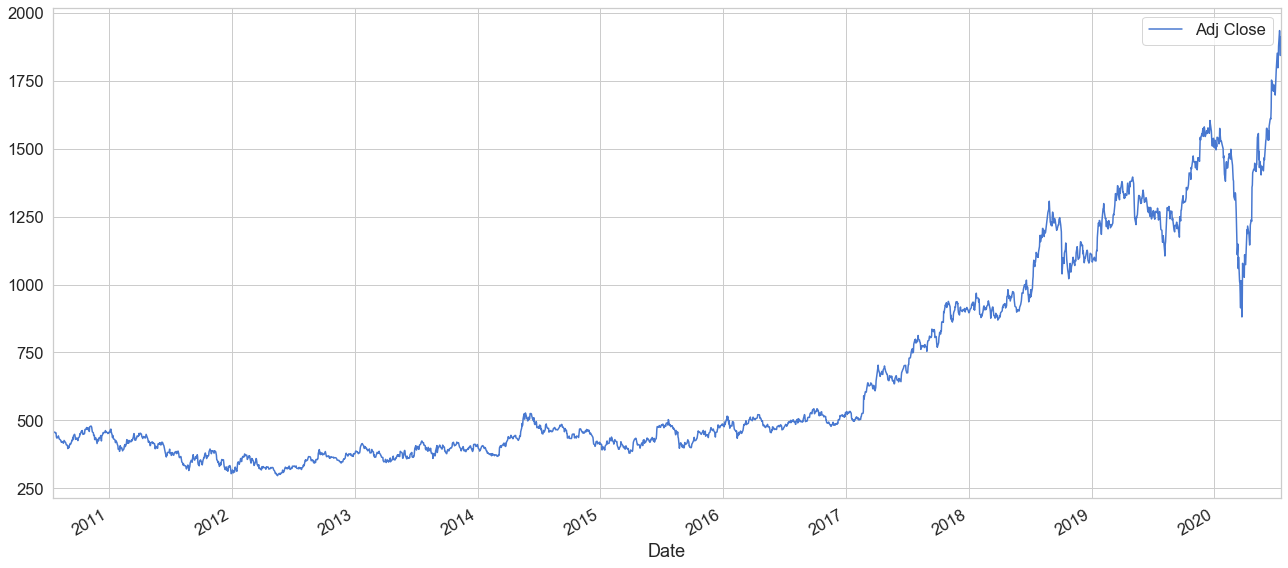

In [21]:
data[['Adj Close']].plot()

In [22]:
# Drop other columns
data = data[['Adj Close']]

In [23]:
data = data.reset_index()

In [24]:
# Prophet expects the below naming convention
data.columns = ["ds","y"]

In [25]:
data.head()

,ds,y
0,2010-07-19,455.206757
1,2010-07-20,453.870514
2,2010-07-21,456.219727
3,2010-07-22,456.478424
4,2010-07-23,457.103394


In [27]:
from fbprophet import Prophet

In [29]:
### intiialize the Model
model=Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
# Create future forecasts for next 30 days
future_forecasts = model.make_future_dataframe(periods=30)

In [32]:
future_forecasts.tail()

,ds
2487,2020-08-12
2488,2020-08-13
2489,2020-08-14
2490,2020-08-15
2491,2020-08-16


In [33]:
prediction = model.predict(future_forecasts)

In [44]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-07-19,451.973669,392.532242,554.608738,451.973669,451.973669,24.233820,24.233820,24.233820,-0.662551,-0.662551,-0.662551,24.896371,24.896371,24.896371,0.0,0.0,0.0,476.207489
1,2010-07-20,451.802972,388.586790,559.622397,451.802972,451.802972,23.734321,23.734321,23.734321,0.017327,0.017327,0.017327,23.716994,23.716994,23.716994,0.0,0.0,0.0,475.537293
2,2010-07-21,451.632274,383.291794,558.337050,451.632274,451.632274,21.300661,21.300661,21.300661,-1.103240,-1.103240,-1.103240,22.403901,22.403901,22.403901,0.0,0.0,0.0,472.932935
3,2010-07-22,451.461577,384.661975,550.097994,451.461577,451.461577,20.782815,20.782815,20.782815,-0.191038,-0.191038,-0.191038,20.973853,20.973853,20.973853,0.0,0.0,0.0,472.244392
4,2010-07-23,451.290879,385.962548,556.950121,451.290879,451.290879,19.829327,19.829327,19.829327,0.383646,0.383646,0.383646,19.445681,19.445681,19.445681,0.0,0.0,0.0,471.120207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,2020-08-12,1561.133636,1472.609873,1638.924002,1561.133636,1561.133636,-2.761682,-2.761682,-2.761682,-1.103240,-1.103240,-1.103240,-1.658442,-1.658442,-1.658442,0.0,0.0,0.0,1558.371954
2488,2020-08-13,1561.795423,1477.913373,1646.628687,1561.795423,1561.795423,-1.592292,-1.592292,-1.592292,-0.191038,-0.191038,-0.191038,-1.401254,-1.401254,-1.401254,0.0,0.0,0.0,1560.203131
2489,2020-08-14,1562.457210,1477.209328,1650.757080,1562.456782,1562.457210,-0.672934,-0.672934,-0.672934,0.383646,0.383646,0.383646,-1.056580,-1.056580,-1.056580,0.0,0.0,0.0,1561.784276
2490,2020-08-15,1563.118997,1479.031404,1646.646953,1563.116067,1563.118997,0.137551,0.137551,0.137551,0.777928,0.777928,0.777928,-0.640377,-0.640377,-0.640377,0.0,0.0,0.0,1563.256548


The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.


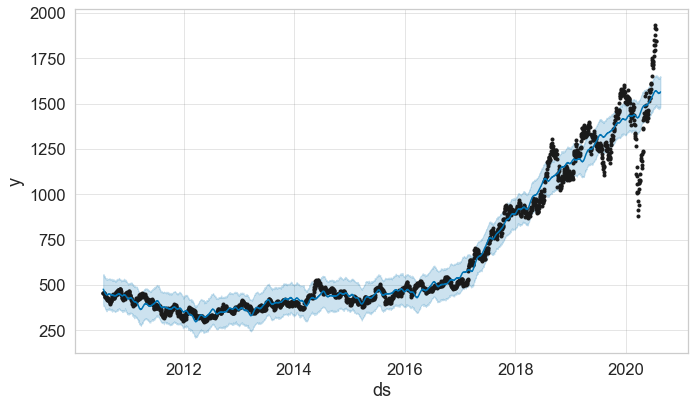

In [43]:
model.plot(prediction);


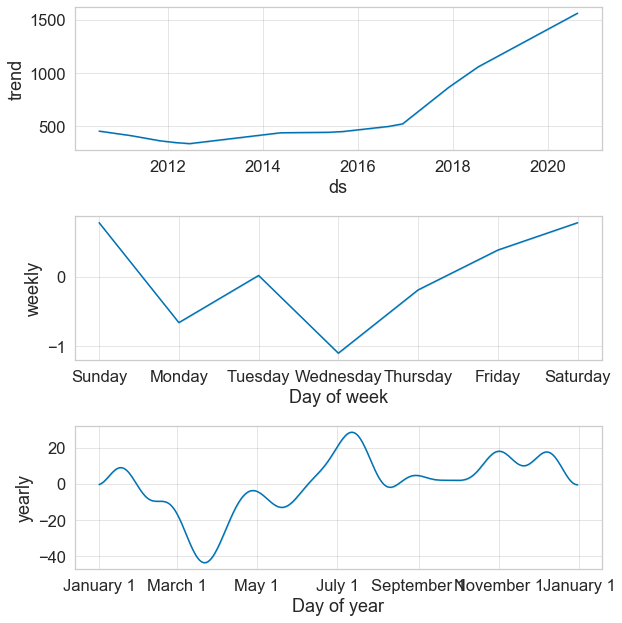

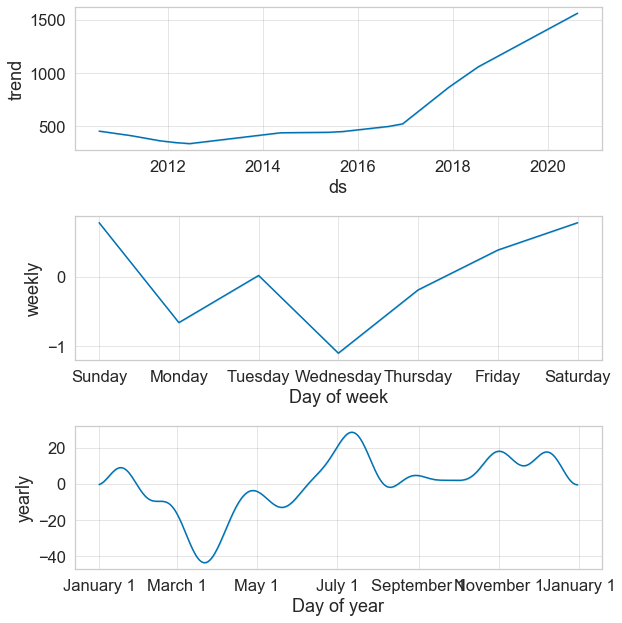

In [45]:
model.plot_components(prediction)

## Cross Validation using Past data

In [46]:
from fbprophet.diagnostics import cross_validation


In [47]:
data_cv = cross_validation(model,horizon="365 days")

INFO:fbprophet:Making 13 forecasts with cutoffs between 2013-07-19 00:00:00 and 2019-07-18 00:00:00


In [48]:
data.head()

,ds,y
0,2010-07-19,455.206757
1,2010-07-20,453.870514
2,2010-07-21,456.219727
3,2010-07-22,456.478424
4,2010-07-23,457.103394


In [49]:
data_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-07-22,392.361491,370.719942,412.571803,417.590881,2013-07-19
1,2013-07-23,392.753293,372.881712,413.088344,417.820526,2013-07-19
2,2013-07-24,393.595499,371.712066,413.802193,417.728638,2013-07-19
3,2013-07-25,391.463282,370.103139,412.525718,409.184387,2013-07-19
4,2013-07-26,391.018187,369.052099,410.783144,408.908752,2013-07-19


#### Obtaining the Performance Metrics
 
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [51]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(data_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,5276.862186,72.642014,48.872637,0.066007,0.050591,0.484277
1,37 days 00:00:00,5360.318407,73.214195,48.997627,0.065998,0.050091,0.487421
2,37 days 12:00:00,5375.993331,73.321166,49.120051,0.066405,0.050591,0.484277
3,38 days 00:00:00,5339.888641,73.074542,48.652404,0.065779,0.049636,0.491824
4,38 days 12:00:00,5345.630881,73.113821,48.719483,0.066178,0.050591,0.488679


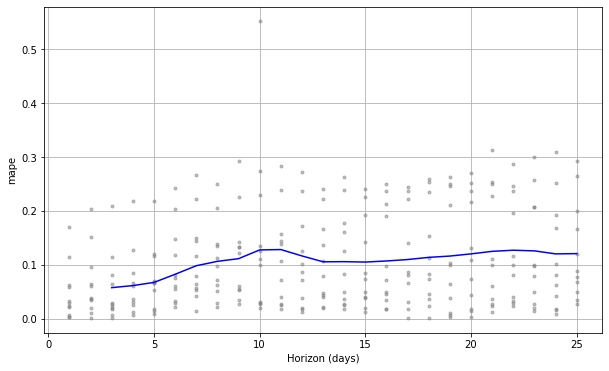

In [54]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mape')